In [1]:
#OpenCV module
import cv2
#os module for reading training data directories and paths
import os
#numpy to convert python lists to numpy arrays as it is needed by OpenCV face recognizers
import numpy as np#import OpenCV module

#matplotlib for display our images
import matplotlib.pyplot as plt
%matplotlib inline 


In [2]:
#there is no label 0 in our training data so subject name for index/label 0 is empty
subjects = ["", "Amaan", "Surya","Nehanshu"]

In [3]:
# HAAR
#function to detect face using OpenCV
def detect_face(img):
    #convert the test image to gray image as opencv face detector expects gray images
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    #load OpenCV face detector, I am using LBP which is fast
    #there is also a more accurate but slow Haar classifier
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    #let's detect multiscale (some images may be closer to camera than others) images
    #result is a list of faces
    faces = face_cascade.detectMultiScale(gray, 1.1, 4);
    
    #if no faces are detected then return original img
    if (len(faces) == 0):
        return None, None
    
    #under the assumption that there will be only one face,
    #extract the face area
    (x, y, w, h) = faces[0]
    
    #return only the face part of the image
    return gray[y:y+w, x:x+h], faces[0]



In [6]:
#LBPH
#function to detect face using OpenCV
def detect_face(img):
    #convert the test image to gray image as opencv face detector expects gray images
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    #load OpenCV face detector, I am using LBP which is fast
    #there is also a more accurate but slow Haar classifier
    face_cascade = cv2.CascadeClassifier(r'C:\Users\nehan\Documents\Mega Sync\VJTI\Sum Pro\LBPH\lbp_cascades\lbpcascade_frontalface_improved.xml')

    #let's detect multiscale (some images may be closer to camera than others) images
    #result is a list of faces
    faces = face_cascade.detectMultiScale(gray, 1.1, 4);
    
    #if no faces are detected then return original img
    if (len(faces) == 0):
        return None, None
    
    #under the assumption that there will be only one face,
    #extract the face area
    (x, y, w, h) = faces[0]
    
    #return only the face part of the image
    return gray[y:y+w, x:x+h], faces[0]


In [4]:
#this function will read all persons' training images, detect face from each image
#and will return two lists of exactly same size, one list 
# of faces and another list of labels for each face
def prepare_training_data(data_folder_path):
    
    #------STEP-1--------
    #get the directories (one directory for each subject) in data folder
    dirs = os.listdir(data_folder_path)
    
    #list to hold all subject faces
    faces = []
    #list to hold labels for all subjects
    labels = []
    
    #let's go through each directory and read images within it
    for dir_name in dirs:
        
        #our subject directories start with letter 's' so
        #ignore any non-relevant directories if any
        if not dir_name.startswith("s"):
            continue;
            
        #------STEP-2--------
        #extract label number of subject from dir_name
        #format of dir name = slabel
        #, so removing letter 's' from dir_name will give us label
        label = int(dir_name.replace("s", ""))
        
        #build path of directory containin images for current subject subject
        #sample subject_dir_path = "training-data/s1"
        subject_dir_path = data_folder_path + "/" + dir_name
        
        #get the images names that are inside the given subject directory
        subject_images_names = os.listdir(subject_dir_path)
        
        #------STEP-3--------
        #go through each image name, read image, 
        #detect face and add face to list of faces
        for image_name in subject_images_names:
            
            #ignore system files like .DS_Store
            if image_name.startswith("."):
                continue;
            
            #build image path
            #sample image path = training-data/s1/1.pgm
            image_path = subject_dir_path + "/" + image_name

            #read image
            image = cv2.imread(image_path)
            
            #display an image window to show the image 
            cv2.imshow("Training on image...", image)
            cv2.waitKey(100)
            
            #detect face
            face, rect = detect_face(image)
            
            #------STEP-4--------
            #for the purpose of this tutorial
            #we will ignore faces that are not detected
            if face is not None:
                #add face to list of faces
                faces.append(face)
                #add label for this face
                labels.append(label)
            
    cv2.destroyAllWindows()
    cv2.waitKey(1)
    cv2.destroyAllWindows()
    
    return faces, labels


In [5]:
#let's first prepare our training data
#data will be in two lists of same size
#one list will contain all the faces
#and other list will contain respective labels for each face
print("Preparing data...")
faces, labels = prepare_training_data("training-data")
print("Data prepared")

#print total faces and labels
print("Total faces: ", len(faces))
print("Total labels: ", len(labels))


Preparing data...
Data prepared
Total faces:  56
Total labels:  56


In [6]:
#create our LBPH face recognizer 
recognizer = cv2.face.LBPHFaceRecognizer_create()

#or use EigenFaceRecognizer by replacing above line with 
#recognizer = cv2.face.EigenFaceRecognizer_create()

#or use FisherFaceRecognizer by replacing above line with 
#recognizer = cv2.face.FisherFaceRecognizer_create()


In [7]:
#train our face recognizer of our training faces
recognizer.train(faces, np.array(labels))


In [8]:
#function to draw rectangle on image 
#according to given (x, y) coordinates and 
#given width and heigh
def draw_rectangle(img, rect):
    (x, y, w, h) = rect
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
    
#function to draw text on give image starting from
#passed (x, y) coordinates. 
def draw_text(img, text, x, y):
    cv2.putText(img, text, (x, y), cv2.FONT_HERSHEY_PLAIN, 1.5, (0, 255, 0), 2)

In [126]:
#this function recognizes the person in image passed
#and draws a rectangle around detected face with name of the 
#subject
def predict(test_img):
    #make a copy of the image as we don't want to chang original image
    img = test_img.copy()
    #detect face from the image
    face, rect = detect_face(img)

    #predict the image using our face recognizer 
    label= recognizer.predict(face)
    print(list(label))
    #print(type(subjects))
    #get name of respective label returned by face recognizer
    label_text = subjects[label[0]]
    print(type(label_text))
    
    #draw a rectangle around face detected
    draw_rectangle(img, rect)
    #draw name of predicted person
    draw_text(img, label_text, rect[0], rect[1]-5)
    
    return img

Predicting images...
[2, 30.523133507980642]
<class 'str'>
[2, 15.777301319607764]
<class 'str'>
Prediction complete


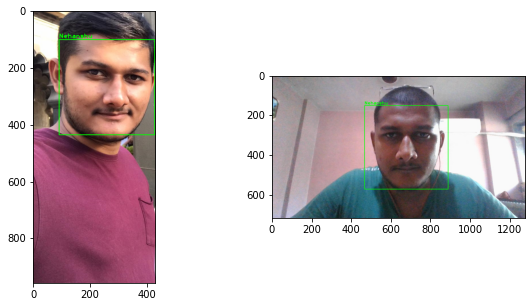

In [128]:
print("Predicting images...")

#load test images
test_img1 = cv2.imread("test-data/n1.jpg")
test_img2 = cv2.imread("test-data/n2.jpg")

#perform a prediction
predicted_img1 = predict(test_img1)
predicted_img2 = predict(test_img2)
print("Prediction complete")

#create a figure of 2 plots (one for each test image)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

#display test image1 result
ax1.imshow(cv2.cvtColor(predicted_img1, cv2.COLOR_BGR2RGB))

#display test image2 result
ax2.imshow(cv2.cvtColor(predicted_img2, cv2.COLOR_BGR2RGB))

#display both images
cv2.imshow("Image", predicted_img1)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imshow("Image", predicted_img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# Video Live Feed
print("Predicting images...")

#load test images
test_img1 = cv2.imread("test-data/n1.jpg")
test_img2 = cv2.imread("test-data/n2.jpg")

#perform a prediction
predicted_img1 = predict(test_img1)
predicted_img2 = predict(test_img2)
print("Prediction complete")

#create a figure of 2 plots (one for each test image)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

#display test image1 result
ax1.imshow(cv2.cvtColor(predicted_img1, cv2.COLOR_BGR2RGB))

#display test image2 result
ax2.imshow(cv2.cvtColor(predicted_img2, cv2.COLOR_BGR2RGB))

#display both images
cv2.imshow("Image", predicted_img1)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imshow("Image", predicted_img2)
cv2.waitKey(0)
cv2.destroyAllWindows()